In [9]:
import pandas as pd
import pyflux as pf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

In [10]:
df = pd.read_excel("311 Team 7- MMR Surprises.xlsx", sheetname="MMR Surprises")
cols = df.columns.tolist()
cols = [elem for elem in cols if "Unnamed" not in elem]
df = df[cols]
df.head()

,Agency,MMR_Goal,Critical,Performance_Indicator,FY13,FY14,FY15,FY16,FY17,TGT17,TGT18,Column_5_Yr_Trend,Desired_Direction
0,ACS,1a,True,Average child protective specialist caseload,8.2,9.8,10.5,10.6,12.4,12,12,Up,Down
1,ACS,1c,True,"Number of moves in foster care per 1,000 care ...",1.3,1.4,1.5,1.4,1.5,1.4,1.4,Up,Down
2,ACS,1c,True,Children maltreated during family foster care ...,3.9,3.1,4,5.2,7.6,4.2,5,Up,Down
3,ACS,3a,True,Abscond rate in non-secure detention (average ...,0.05,0.08,0.05,0.03,0.08,0.03,0.05,Neutral,Down
4,ACS,3a,True,Youth on youth assaults and altercations with ...,0.34,0.35,0.3,0.39,0.38,0.35,0.35,Up,Down


In [11]:
def create_timeseries_frame(row):
    dicter = {
        "values":[row["FY13"], row["FY14"], row["FY15"], row["FY16"],row["FY17"]],
        "time": [datetime(2013,1,1), datetime(2014, 1, 1), datetime(2015, 1, 1), datetime(2016, 1, 1), datetime(2017, 1, 1)]
    }
    return pd.DataFrame(dicter)

In [13]:
agency_list = set(df["Agency"])
agency_level = {}.fromkeys(agency_list, {})
for index in df.index:
    agency_level[df.ix[index]["Agency"]][df.ix[index]["Performance_Indicator"]] = create_timeseries_frame(df.ix[index])

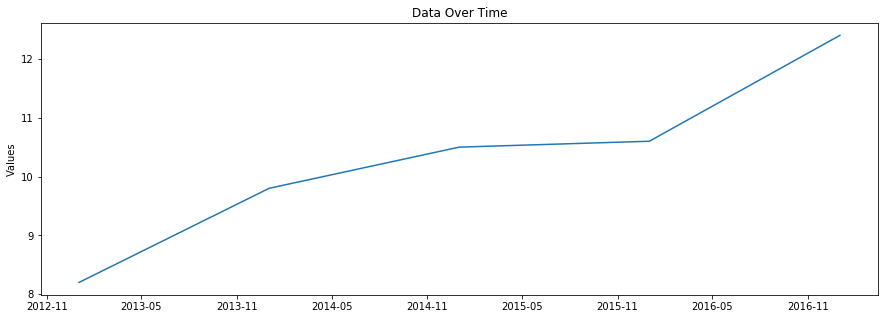

In [43]:
agency = list(agency_level.keys())[0]
performance_outcome = list(agency_level[agency].keys())[0]
data = agency_level[agency][performance_outcome]
data.index = data['time'].values

plt.figure(figsize=(15,5))
plt.plot(data.index,data['values'])
plt.ylabel('Values')
plt.title('Data Over Time');

In [44]:
model = pf.ARIMA(data=data,ar=2,ma=0,integ=0,target='values')

In [45]:
x = model.fit("MLE")
x.summary()

Normal ARIMA(2,0,0)                                                                                       
======================================================= ==================================================
Dependent Variable: values                              Method: MLE                                       
Start Date: 2015-01-01 00:00:00                         Log Likelihood: 32.5191                           
End Date: 2017-01-01 00:00:00                           AIC: -57.0383                                     
Number of observations: 3                               BIC: -60.6438                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 62.8881    0.0003     218610.5 0.0      (62.8875 | 62.8886)      
AR(1)                                

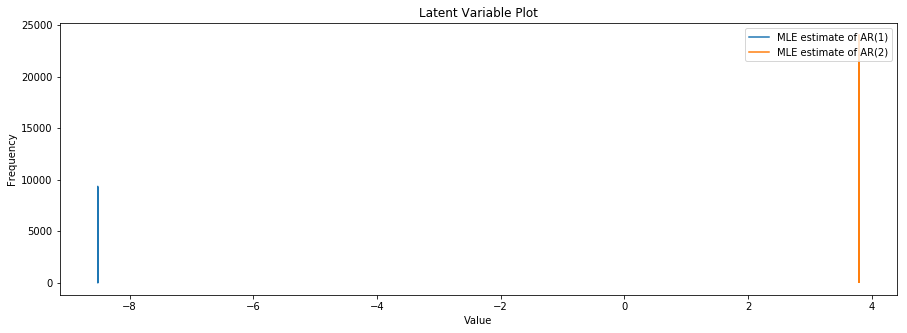

In [46]:
model.plot_z(indices=range(1,3))

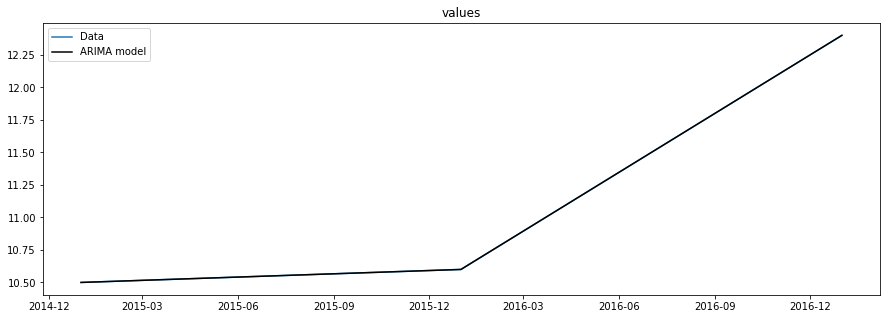

In [47]:
model.plot_fit(figsize=(15,5))

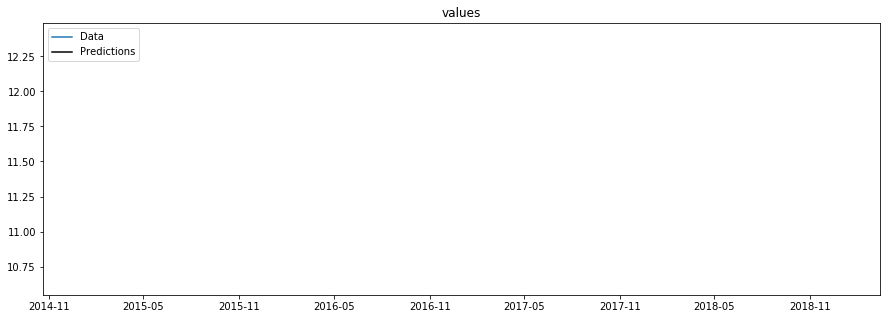

In [48]:
model.plot_predict_is(1,figsize=(15,5))

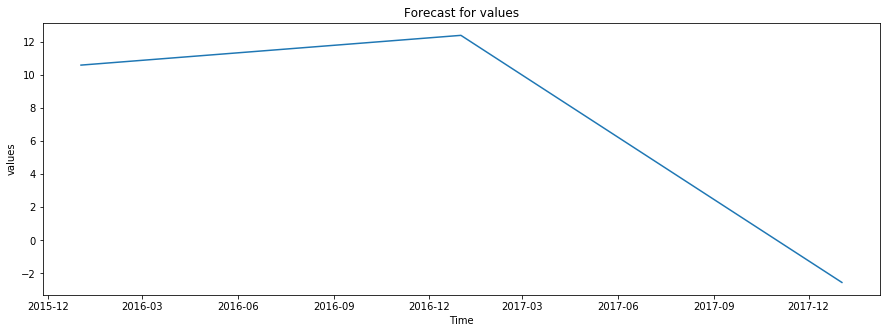

In [52]:
model.plot_predict(h=1,past_values=2,figsize=(15,5))

In [54]:
model.predict(h=2)

,values
2018-01-02,-2.548532
2019-01-03,131.559034
